In [ ]:
!mkdir -o ~/.kaggle
!cp kaggle.json ~/.kaggle/


mkdir: invalid option -- 'o'
Try 'mkdir --help' for more information.


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
... resuming from 1017118720 bytes (125772974 bytes left) ...
100% 1.06G/1.06G [00:07<00:00, 21.9MB/s]
100% 1.06G/1.06G [00:07<00:00, 17.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [ ]:
# generators used for large segment of datas
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels='inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
   #create CNN model

   model = Sequential()
   model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
   model.add(BatchNormalization())
   model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

   model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
   model.add(BatchNormalization())
   model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

   model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
   model.add(BatchNormalization())
   model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

   model.add(Flatten())

   model.add(Dense(128, activation='relu'))
   model.add(Dropout(0.1))
   model.add(Dense(64, activation='relu'))
   model.add(Dropout(0.1))
   model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.6573 - accuracy: 0.5883 - val_loss: 0.5901 - val_accuracy: 0.6980
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5917 - accuracy: 0.6914 - val_loss: 0.5326 - val_accuracy: 0.7338
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5349 - accuracy: 0.7414 - val_loss: 0.4885 - val_accuracy: 0.7644
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4566 - accuracy: 0.7855 - val_loss: 0.4539 - val_accuracy: 0.7826
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3934 - accuracy: 0.8233 - val_loss: 0.4349 - val_accuracy: 0.7922
Epoch 6/10
625/625 [==============================] - 78s 124ms/step - loss: 0.3421 - accuracy: 0.8518 - val_loss: 0.4592 - val_accuracy: 0.7832
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2726 - accuracy: 0.8850 - val_loss: 0.6365 - val_ac

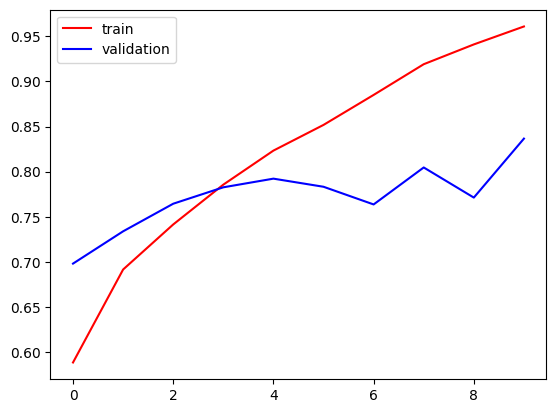

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


as the epoch increases the training accuracy increases  but the validation accuracy remains same nearly.
This is a case of overfitting.

To reduce overfitting:
Add more data
Data Augmentation
L1/L2 Regularizer
Dropout
Batch Norm
Reduce Complexity
```
# This is formatted as code
```



In [21]:
import cv2

In [36]:
test_img = cv2.imread('/content/dog.jpeg')

uint8


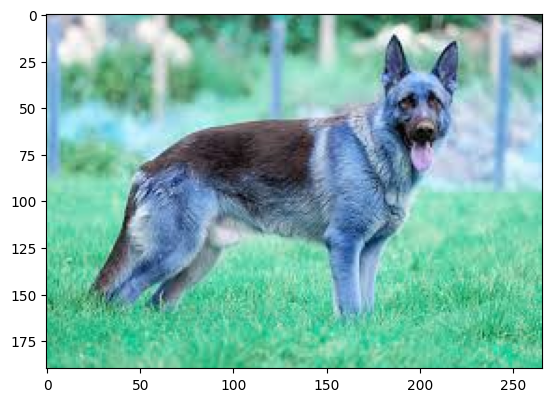

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Verify the file path is correct and the image exists
image_path = '/content/dog.jpeg'
test_img = cv2.imread(image_path)

# Check if the image was loaded successfully
if test_img is None:
    print(f"Failed to load image from {image_path}. Check the file path and ensure the image exists.")
else:
    # Check the dtype of test_img
    print(test_img.dtype)

    # If the dtype is 'object', convert it to a suitable numeric type
    if test_img.dtype == 'object':
        # Example conversion to uint8
        test_img = np.array(test_img, dtype=np.uint8)

    # Now, plot the image
    plt.imshow(test_img)
    plt.show()

In [38]:
test_img.shape

(190, 266, 3)

In [39]:
test_image = cv2.resize(test_img,(256,256))

In [40]:
test_input = test_image.reshape((1,256,256,3))

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)